In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy import stats
import seaborn as sns

In [5]:
df=pd.read_csv('boston housing.csv')

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,Ptratio,blacks,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


***Data Description***
*CRIM - per capita crime rate by town/
ZN - proportion of residential land zoned for lots over 25,000 sq.ft./
INDUS - proportion of non-retail business acres per town/
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)/
NOX - nitric oxides concentration (parts per 10 million)/
RM - average number of rooms per dwelling/
AGE - proportion of owner-occupied units built prior to 1940/
DIS - weighted distances to five Boston employment centres/
RAD - index of accessibility to radial highways/
TAX - full-value property-tax rate per USD10,000/
PTRATIO - pupil-teacher ratio by town/
Blacks - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town/
LSTAT - % lower status of the population/
MEDV - Median value of owner-occupied homes in $1000's*

In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  Ptratio  506 non-null    float64
 11  blacks   506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
#df.drop(['chas'],axis=1)

<center><font size="5">Identification of Outliers

***Method 1 - Data description***

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,Ptratio,blacks,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***Method 2a - Histogram***

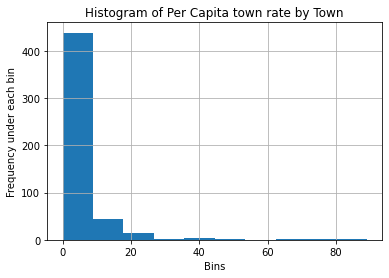

In [11]:
#for single variable
df['crim'].hist()
plt.title("Histogram of Per Capita town rate by Town")
plt.xlabel("Bins")
plt.ylabel("Frequency under each bin")
plt.show()

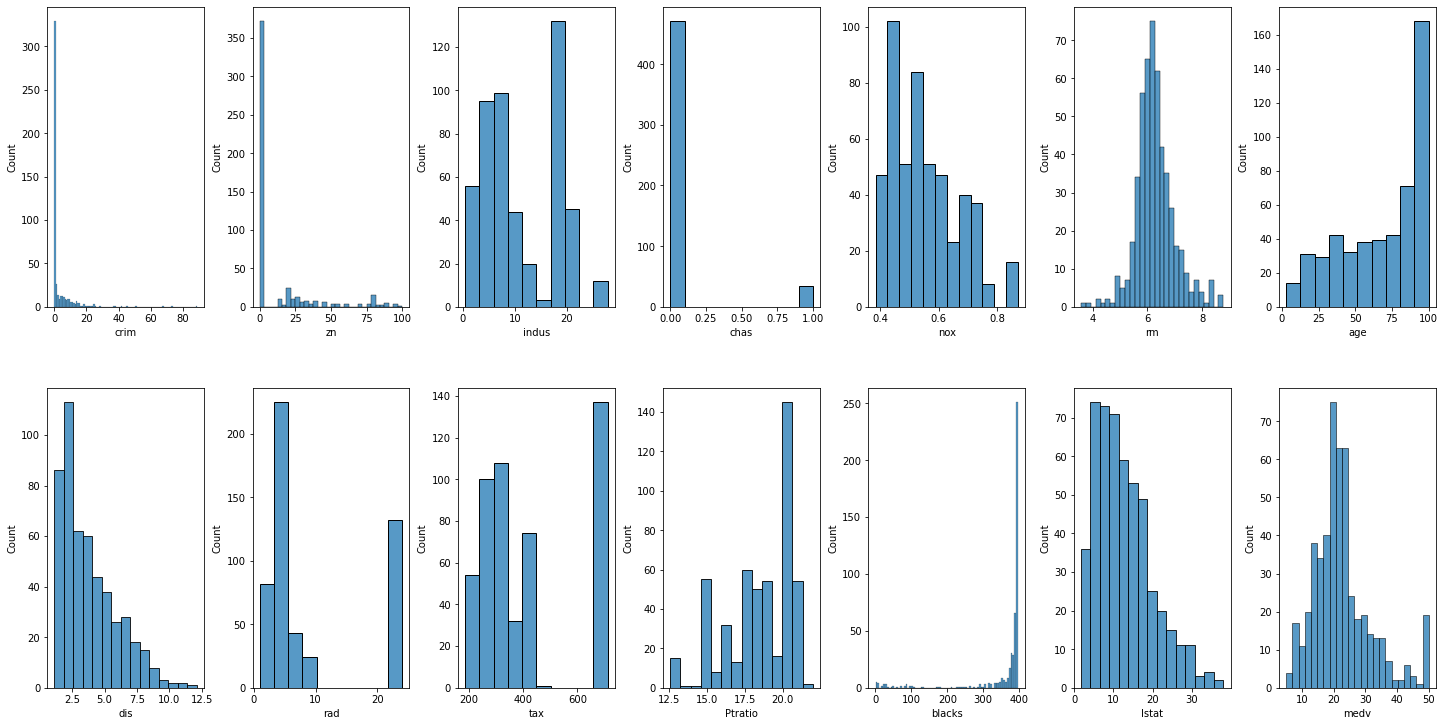

In [12]:
#for multiple variables
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Method 2b - Box Plot***

<AxesSubplot:xlabel='crim'>

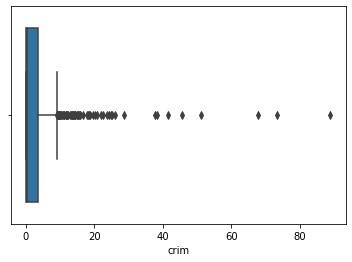

In [13]:
# for single variable
sns.boxplot(x=df['crim'])

In [14]:
df['crim'].where(df['crim']>30).count()

8

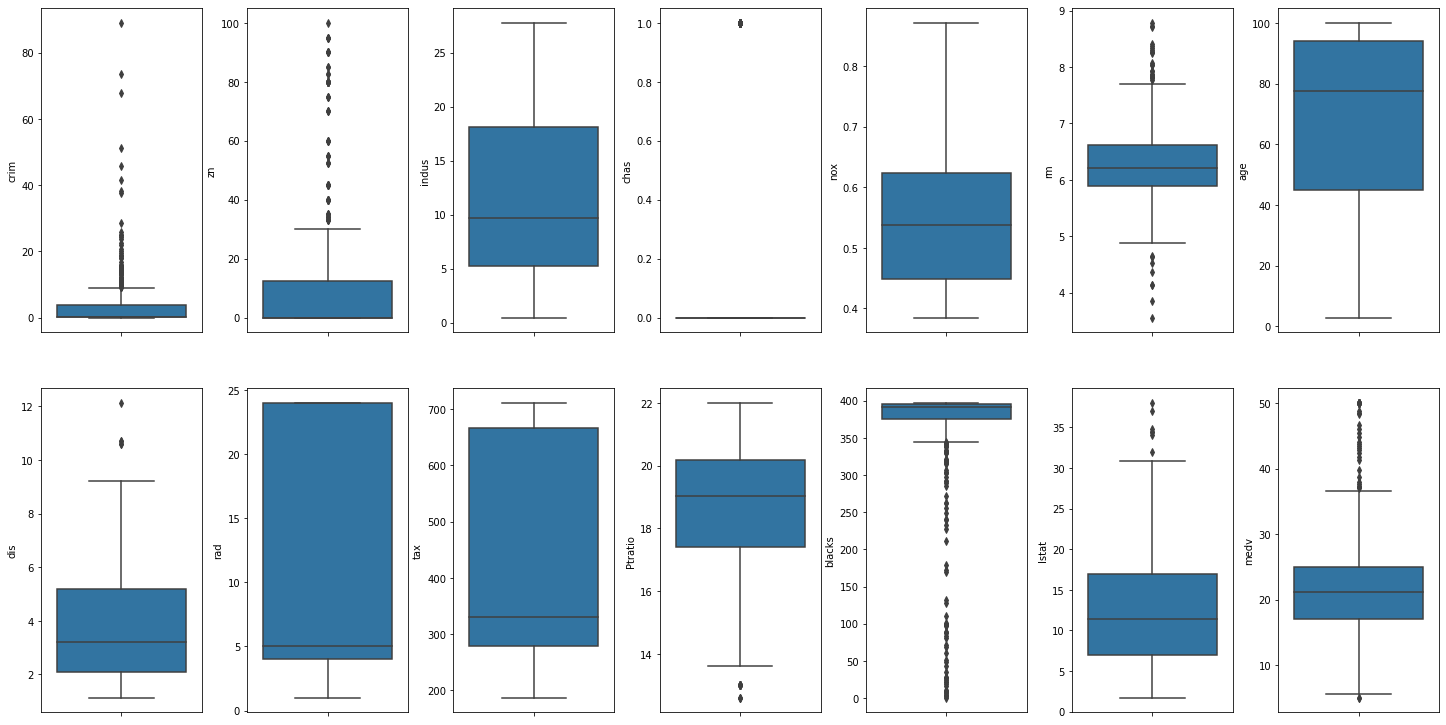

In [15]:
#for multiple variables
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Method 2c - Scatter Plot***

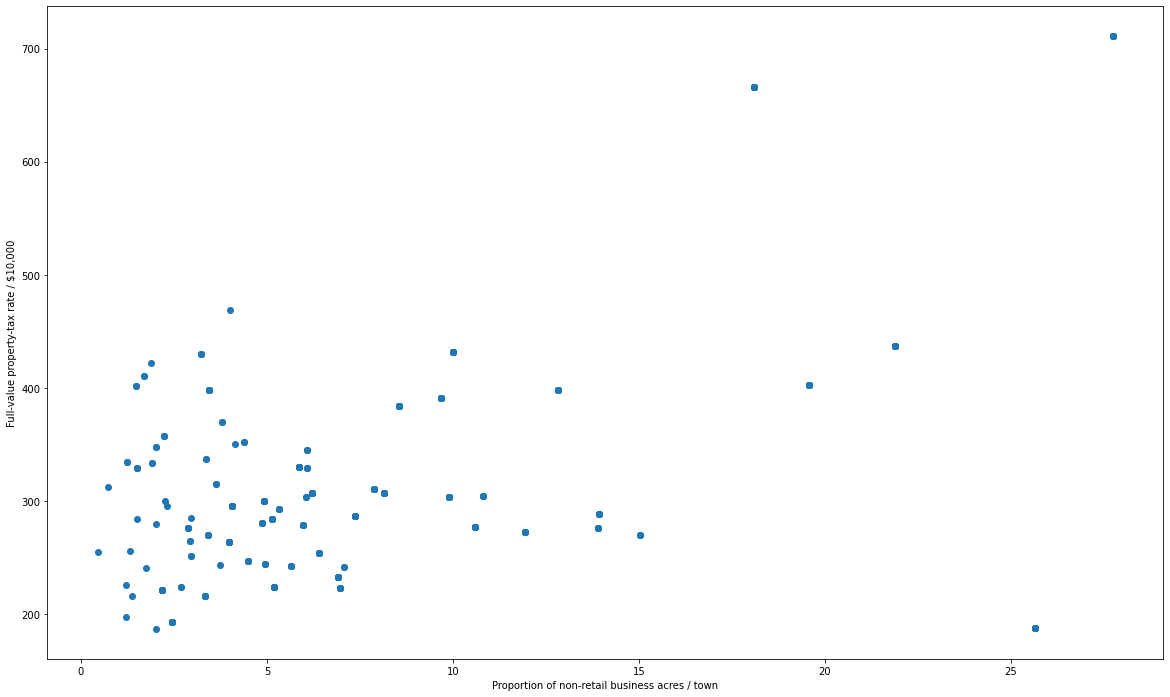

In [16]:
# Scatter plot
fig, ax = plt.subplots(figsize = (20,12))
ax.scatter(df['indus'], df['tax'])
 
# x-axis label
ax.set_xlabel('Proportion of non-retail business acres / town')
 
# y-axis label
ax.set_ylabel('Full-value property-tax rate / $10,000')
plt.show()

***Method 3 - Z-Score***

In [19]:
z = np.abs(stats.zscore(df['crim']))
print(z)

0      0.419782
1      0.417339
2      0.417342
3      0.416750
4      0.412482
         ...   
501    0.413229
502    0.415249
503    0.413447
504    0.407764
505    0.415000
Name: crim, Length: 506, dtype: float64


In [20]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([380, 398, 404, 405, 410, 414, 418, 427], dtype=int64),)


***Method 4 - IQR***

*Detection*

In [21]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column Ptratio outliers = 2.96%
Column blacks outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


In [22]:
# IQR
Q1 = np.percentile(df['crim'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['crim'], 75,
                   interpolation = 'midpoint')
iqr = Q3 - Q1
print('iqr:',iqr,'Q3:',Q3,'Q1:',Q1)
print('old shape:',df.shape)

iqr: 3.593845 Q3: 3.675945 Q1: 0.0821
old shape: (506, 14)


In [23]:
# Above Upper bound
upper = df['crim'] >= (Q3+1.5*iqr)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['crim'] <= (Q1-1.5*iqr)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool
(array([367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
       385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404,
       405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438,
       439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
       479], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool
(array([], dtype=int64),)


<center><font size="5">Removal of Outliers

***Winsorization***

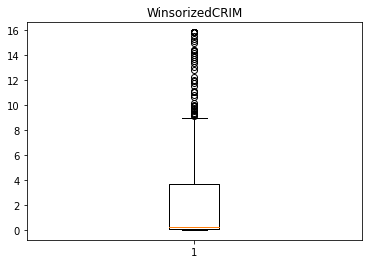

In [24]:
from scipy.stats.mstats import winsorize
WinsorizedCRIM = winsorize(df['crim'],(0.05,0.05))
  
plt.boxplot(WinsorizedCRIM)
plt.title('WinsorizedCRIM')
plt.show()

In [43]:
#Here the count has not decreased as we are not removing the outliers, we are modifying the outlier values
WinsorizedCRIM.count()

506

In [27]:
WinsorizedMean = np.mean(WinsorizedCRIM)
print(WinsorizedMean)

2.8001145652173918


In [32]:
old_mean=df['crim'].mean()
print(old_mean)

3.6135235573122535


***IQR Score***

In [44]:
#Here the count has decreased as we are removing the outliers
df_iqr = df['crim'][~((df['crim'] < (Q1 - 1.5 * iqr)) |(df['crim'] > (Q3 + 1.5 * iqr)))]
df_iqr.count()

440

In [37]:
iqr_mean=df_iqr.mean()
print(iqr_mean)

1.1983409999999992


In [38]:
old_mean=df['crim'].mean()
print(old_mean)

3.6135235573122535


In [36]:
df_iqr

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 440, dtype: float64

***Log Transformation***

<AxesSubplot:xlabel='crim_trans'>

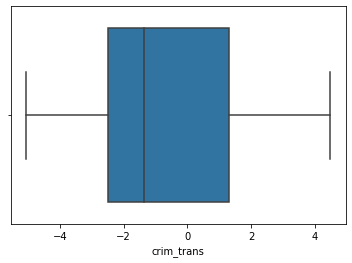

In [40]:
df["crim_trans"] = df["crim"].map(lambda i: np.log(i) if i > 0 else 0)
#new box plot data of crim before log transformation
sns.boxplot(x=df['crim_trans'])

<AxesSubplot:xlabel='crim'>

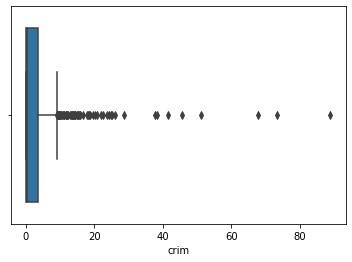

In [41]:
#old box plot of crim before log transformation
sns.boxplot(x=df['crim'])

<center><font size="5">Correlation Analysis

In [48]:
#Correlation table
df1=df.drop(['chas'],axis=1)
df1.corr(method='pearson')

,crim,zn,indus,nox,rm,age,dis,rad,tax,Ptratio,blacks,lstat,medv,crim_trans
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.666486
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.517091
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.730821
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.788616
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.306943
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.658284
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.681903
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.853407
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.828234
Ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787,0.389554


<AxesSubplot:>

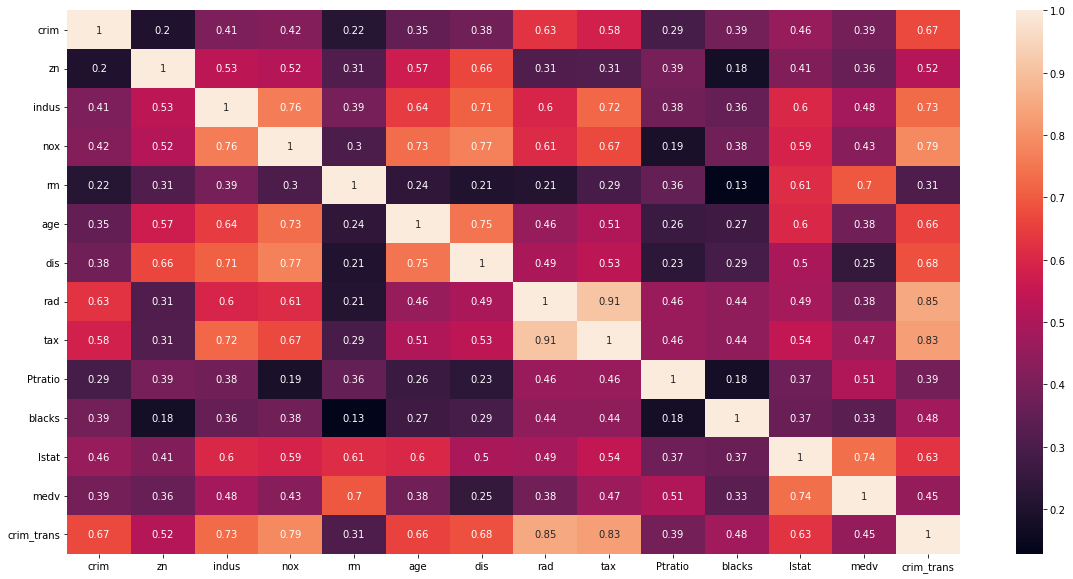

In [49]:
#Correlation heatmaps
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr(method='pearson').abs(),  annot=True)